In [1]:
import os
import numpy as np

from airLibs import airfoil as af
from airLibs import runF2w as f2w
from airLibs import plotting as aplt
from airLibs import runOpenFoam as of
from airLibs import runXFoil as xf

# Reynolds And Mach and AoA

In [2]:
def ms2mach(ms):
    return ms / 340.29

def Re(v, c, n):
    return (v * c) / n

In [3]:
chordMax = 0.18
chordMin = 0.11
umax = 30
umin = 5
ne = 1.56e-5

In [4]:
Machmin = ms2mach(10)
Machmax = ms2mach(30)
Remax = Re(umax, chordMax, ne)
Remin = Re(umin, chordMin, ne)
AoAmax = 15
AoAmin = -6
NoAoA = (AoAmax - AoAmin) * 2 + 1

angles = np.linspace(AoAmin, AoAmax, NoAoA)
Reynolds = np.logspace(np.log10(Remin), np.log10(Remax), 20, base=10)
Mach = np.linspace(Machmax, Machmin, 10)

Reyn = Remin
MACH = Machmax

In [5]:
CASE = "Rudder"
os.chdir(CASE)
caseDir = f"Reynolds_{np.format_float_scientific(Reyn,sign=False,precision=3).replace('+', '')}"
os.system(f"mkdir -p {caseDir}")
os.chdir(caseDir)
caseDir = os.getcwd()

In [6]:
for i in os.listdir():
    if i.startswith("naca"):
        airfile = i
airfoil = airfile[4:]

In [7]:
clcdcmFW = f2w.makeCLCD(Reyn, MACH)
clcdcmXF = xf.runXFoil(Reyn, MACH, angles, airfoil)
clcdcmOF = of.makeCLCD(angles)

OK


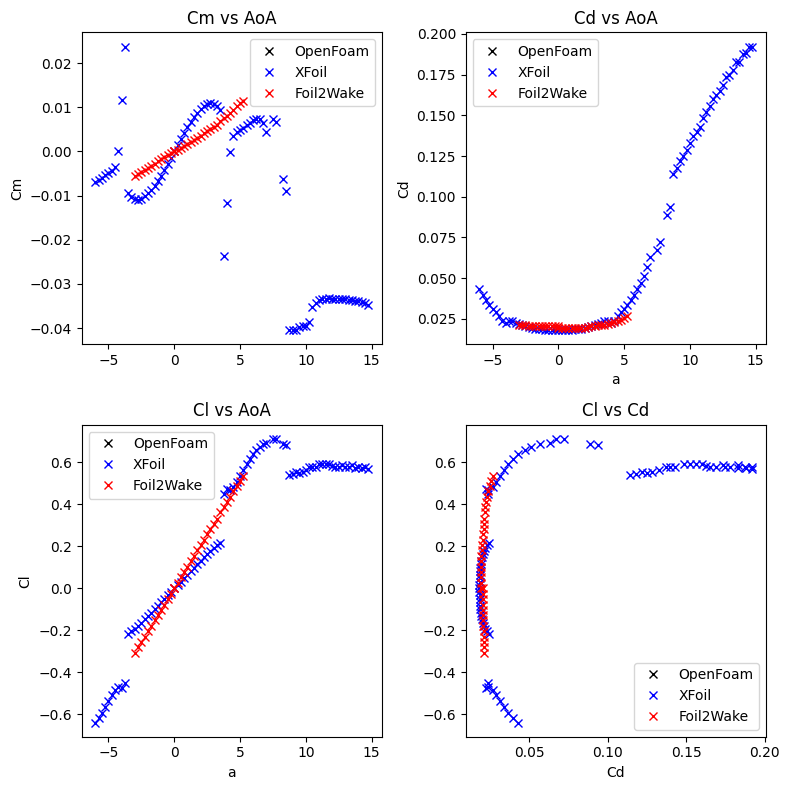

In [8]:
f2w = [clcdcmFW, "rx", "Foil2Wake"]
openF = [clcdcmOF, "kx", "OpenFoam"]
Xfoil = [clcdcmXF, "bx", "XFoil"]
aplt.plotAeorCoeffs([openF,Xfoil, f2w])
